In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

In [7]:
import csv
from datetime import datetime


def convert_row(row):
    """
    Take a row and convert the values to the known data types.
    """
#     duration is in seconds
    row['age'] = float(row['age'])
    row['weight_kg'] = float(row['weight_kg'])
    row['height_cm'] = float(row['height_cm'])
    
    
def read_records(filename):
    """
    Read a CSV file into a list of dictionaries, where each 
    dictionary has keys taken from the column names in the file.
    """
    records = []
    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            convert_row(row)            
            records.append(row)

    return records

In [8]:
data = read_records('../data/players_22.csv')
print('Read in {} records'.format(len(data)))



Read in 19239 records


In [13]:
ages = [row['age'] for row in data]
heights = [row['height_cm'] for row in data]
weights = [row['weight_kg'] for row in data]


(array([0.00015288, 0.00161029, 0.0109561 , 0.0307586 , 0.04830874,
        0.05009229, 0.03636404, 0.01482895, 0.00275176, 0.00025479]),
 array([155. , 160.1, 165.2, 170.3, 175.4, 180.5, 185.6, 190.7, 195.8,
        200.9, 206. ]),
 <BarContainer object of 10 artists>)

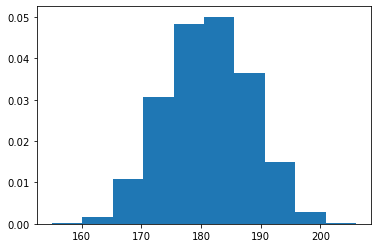

In [16]:
plt.hist(heights, density=True)

In [21]:
def calculate_mean(data_lst):
    return sum(data_lst)/len(data_lst)




In [23]:
def calculate_variance(data_list, mean):
    diff = 0
    for item in data_list:
        diff += (item - mean)**2
    return diff/len(data_list)

In [24]:
mean = calculate_mean(heights)
variance = calculate_variance(heights, mean)

In [25]:
print(mean, variance)

181.29970372680492 47.100780098302835


In [26]:
x = np.linspace(min(heights), max(heights), 1000)

In [36]:
def norm_pdf(x, mu, var):
    return 1/(math.sqrt(2*math.pi*var))*math.exp(-0.5*((x-mean)**2)/var)

In [37]:
y = [norm_pdf(x_i, mean, variance) for x_i in x]

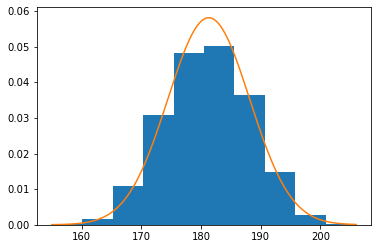

In [38]:
plt.hist(heights, density=True)
plt.plot(x,y)

In [34]:
mu, std = stats.norm.fit(heights)
print(mu, std, std**2)

181.29970372680492 6.8630008085605345 47.10078009830255


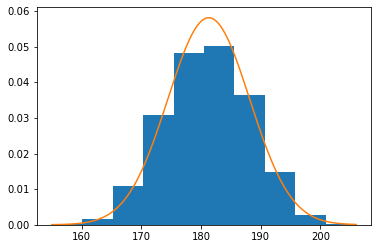

In [35]:
plt.hist(heights, density=True)
plt.plot(x,stats.norm.pdf(x, mu, std))